# Cloning dataset github repo

In [1]:
!git clone https://github.com/nholmber/google-colab-cs231n.git

fatal: destination path 'google-colab-cs231n' already exists and is not an empty directory.


In [2]:
%cd google-colab-cs231n/assignment1

/content/google-colab-cs231n/assignment1


In [3]:
%cd cs231n/datasets/
!ls

/content/google-colab-cs231n/assignment1/cs231n/datasets
cifar-10-batches-py  get_datasets.sh


In [4]:
!more get_datasets.sh

# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 


In [5]:
!./get_datasets.sh

--2022-03-09 03:34:14--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  38.5MB/s    in 4.4s    

2022-03-09 03:34:18 (36.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [6]:
%cd ../..
!ls

/content/google-colab-cs231n/assignment1
collectSubmission.sh  README.md		    svm.ipynb
cs231n		      requirements.txt	    two_layer_net_colab.ipynb
features.ipynb	      setup_googlecloud.sh  two_layer_net.ipynb
frameworkpython       softmax.ipynb
knn.ipynb	      start_ipython_osx.sh


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.data_utils import load_CIFAR10
import download

%matplotlib inline

In [8]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)
    
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred


# Load the raw CIFAR-10 data

In [9]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


# Visualize some examples from the dataset.

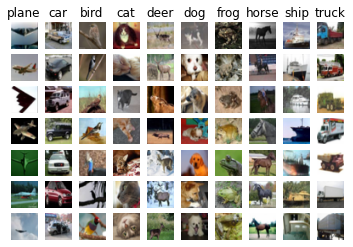

In [10]:
# a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Subsample the data for execution

In [11]:
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# reshaping data and placing into rows

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


# Performing K-NN

In [13]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 296 / 1000 correct => accuracy: 0.296000


#  5-fold cross validation on k-NN for varying values of k

In [14]:
num_folds = 5
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}



for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num_test
        print('Got %d / %d correct => accuracy: %f k: %d' % (num_correct, num_test, accuracy, k))
        k_to_accuracies[k].append(accuracy)


print("Printing 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Got 577 / 1000 correct => accuracy: 0.577000 k: 1
Got 568 / 1000 correct => accuracy: 0.568000 k: 1
Got 565 / 1000 correct => accuracy: 0.565000 k: 1
Got 549 / 1000 correct => accuracy: 0.549000 k: 1
Got 554 / 1000 correct => accuracy: 0.554000 k: 1
Got 525 / 1000 correct => accuracy: 0.525000 k: 2
Got 519 / 1000 correct => accuracy: 0.519000 k: 2
Got 513 / 1000 correct => accuracy: 0.513000 k: 2
Got 498 / 1000 correct => accuracy: 0.498000 k: 2
Got 499 / 1000 correct => accuracy: 0.499000 k: 2
Got 575 / 1000 correct => accuracy: 0.575000 k: 3
Got 548 / 1000 correct => accuracy: 0.548000 k: 3
Got 557 / 1000 correct => accuracy: 0.557000 k: 3
Got 535 / 1000 correct => accuracy: 0.535000 k: 3
Got 531 / 1000 correct => accuracy: 0.531000 k: 3
Got 607 / 1000 correct => accuracy: 0.607000 k: 4
Got 566 / 1000 correct => accuracy: 0.566000 k: 4
Got 576 / 1000 correct => accuracy: 0.576000 k: 4
Got 553 / 1000 correct => accuracy: 0.553000 k: 4
Got 549 / 1000 correct => accuracy: 0.549000 k: 4


# plot the trend line with error bars that correspond to standard deviation

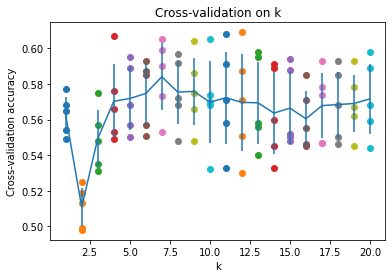

In [15]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

plt.show()

# Result Analysis
K-Nearest Neighbor is one of the simplest machine learning algorithm which works based on distance calculation. In this implementation, the Cifar-10 dataset has been used and Euclidean distance has been calculated for classification. The mean and standard deviation has been calculated for the accurate result of the 5 fold cross-validation. From the errorbar graph, we can see that KNN is not an efficient algorithm for image classification. After performing 5 fold cross-validation, the best result have found is 0.6090 at k = 12. There are other methods to classfy images with very good results, but KNN is not very efficient for this task.